In [1]:
import numpy as np
import random
from scipy.stats import norm

# we create two sample data sets
#
# one where there is a genuine correlation, affected by fluctuations
#
# another where there is in reality only noise
#
def fct_a(x):
    return x*x*x - 10*x*x + 1000*x

def fct_b(x):
    return 10000

# x is a list of numbers
# a list of function values y is returned, affected by fluctuations both in x and y
#
def noisy_function(fct, x, std_dev_x, std_dev_y):
    x_with_noise = [norm.rvs(loc=el, scale=std_dev_x) for el in x]
    y_without_noise = [fct(el) for el in x_with_noise]
    y = [norm.rvs(loc=el, scale=std_dev_y) for el in y_without_noise]
    return y

# training data sets (11 points)
#
x_dataset   = np.arange(7.5, 13, 0.5) 
# y_dataset_a = noisy_function(fct_a, x_dataset, 2, 2000)
# y_dataset_b = noisy_function(fct_b, x_dataset, 2, 2000)
y_dataset_a = [8134.954014294244, 7664.454536656712, 7292.615198293872, 11294.247307331807, 9308.182063702076, 10364.120200308784, 6096.88065503228, 11500.58730935783, 11866.834426880574, 14121.490470610051, 17829.608581492623]
y_dataset_b = [11299.118651430934, 10889.07956354913, 10104.032176810824, 9772.222576402488, 7615.863968189953, 7166.207123623104, 9587.376311636128, 10089.76839071942, 12245.873934151137, 15312.372415807762, 11089.157349763422]
#
print("*** TRAINING DATA ***\n\nx_dataset:\t", x_dataset)
print("y_dataset_a:\t", y_dataset_a)
print("y_dataset_b:\t", y_dataset_b)

# averages of training data for null hypothesis
#
y_dataset_average_a = sum(y_dataset_a) / len(y_dataset_a)
y_dataset_average_b = sum(y_dataset_b) / len(y_dataset_b)
print("Average of a): \t", y_dataset_average_a)
print("Average of b): \t", y_dataset_average_b)

# validation data sets (4 points)
#
# x_val_dataset = [random.uniform(7, 13) for i in range(4)]
# y_val_dataset_a = noisy_function(fct_a, x_val_dataset, 2, 2000)
# y_val_dataset_b = noisy_function(fct_b, x_val_dataset, 2, 2000)
x_val_dataset = [7.54477974952053, 7.043574129282521, 9.601448060642774, 11.092578169460857]
y_val_dataset_a = [8561.570339026293, 8262.304319676046, 6744.240479507779, 15489.747397271709]
y_val_dataset_b = [9310.35482305779, 11568.725210836834, 9478.014516021107, 11959.653382422239]
#
print("\n*** VALIDATION DATA ***\n\nx_val_dataset:\t", x_val_dataset)
print("y_val_dataset_a:\t", y_val_dataset_a)
print("y_val_dataset_b:\t", y_val_dataset_b)

# test data sets (4 points)
#
# x_test_dataset = [random.uniform(7, 13) for i in range(4)]
# y_test_dataset_a = noisy_function(fct_a, x_test_dataset, 2, 2000)
# y_test_dataset_b = noisy_function(fct_b, x_test_dataset, 2, 2000)
x_test_dataset = [12.469285425436453, 9.75344272509386, 8.984572725678257, 7.500997393955975]
y_test_dataset_a = [12069.808724152168, 13587.15808215218, 11333.589922650714, 8554.276838720696]
y_test_dataset_b = [11548.71397505142, 6592.134117239867, 9896.130091884625, 11800.385544607743]
#
print("\n*** TEST DATA ***\n\nx_test_dataset:\t", x_test_dataset)
print("y_test_dataset_a:\t", y_test_dataset_a)
print("y_test_dataset_b:\t", y_test_dataset_b)

*** TRAINING DATA ***

x_dataset:	 [ 7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5]
y_dataset_a:	 [8134.954014294244, 7664.454536656712, 7292.615198293872, 11294.247307331807, 9308.182063702076, 10364.120200308784, 6096.88065503228, 11500.58730935783, 11866.834426880574, 14121.490470610051, 17829.608581492623]
y_dataset_b:	 [11299.118651430934, 10889.07956354913, 10104.032176810824, 9772.222576402488, 7615.863968189953, 7166.207123623104, 9587.376311636128, 10089.76839071942, 12245.873934151137, 15312.372415807762, 11089.157349763422]
Average of a): 	 10497.634069450984
Average of b): 	 10470.097496553119

*** VALIDATION DATA ***

x_val_dataset:	 [7.54477974952053, 7.043574129282521, 9.601448060642774, 11.092578169460857]
y_val_dataset_a:	 [8561.570339026293, 8262.304319676046, 6744.240479507779, 15489.747397271709]
y_val_dataset_b:	 [9310.35482305779, 11568.725210836834, 9478.014516021107, 11959.653382422239]

*** TEST DATA ***

x_test_dataset:	 [12.469285425436453, 9.75344272

<AxesSubplot:xlabel='x', ylabel='y'>

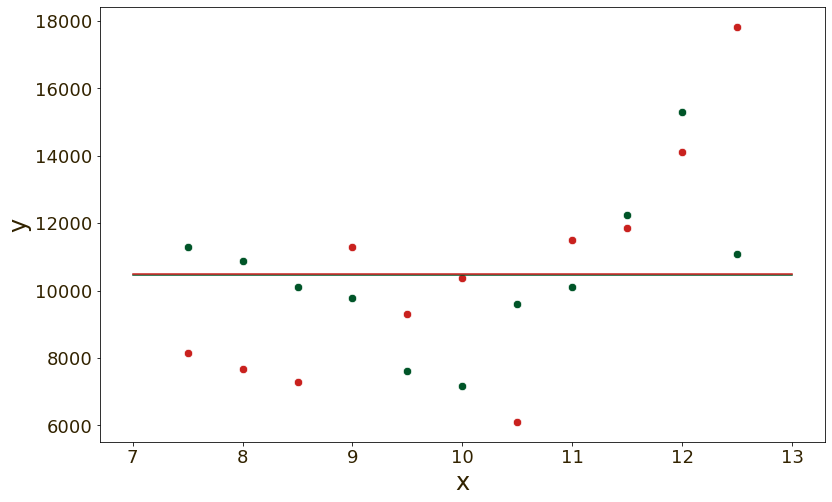

In [2]:
import seaborn as sbn
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("x", fontsize=24, color="#322300")
ax.set_ylabel("y", fontsize=24, color="#322300")

sbn.scatterplot(x=x_dataset, y=y_dataset_a, color="#c9211e", s=70)  # red for data set A
sbn.scatterplot(x=x_dataset, y=y_dataset_b, color="#005528", s=70)  # green for data set B

sbn.lineplot(x=[7, 13], y=[y_dataset_average_b, y_dataset_average_b], color='#005528', ax=ax)
sbn.lineplot(x=[7, 13], y=[y_dataset_average_a, y_dataset_average_a], color='#c9211e', ax=ax)

<AxesSubplot:xlabel='x', ylabel='y'>

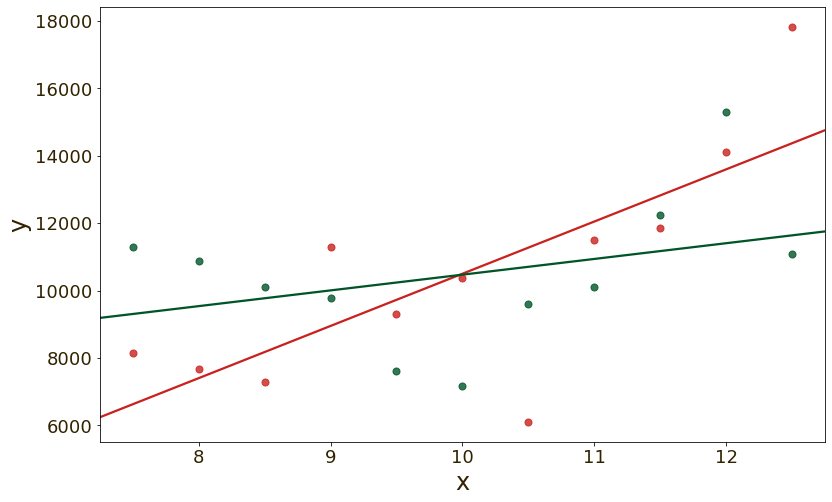

In [3]:
# graphical linear regression using seaborn
#
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("x", fontsize=24, color="#322300")
ax.set_ylabel("y", fontsize=24, color="#322300")

sbn.regplot(x=x_dataset, y=y_dataset_a, color='#c9211e', order=1, \
            scatter_kws={'s':50}, ci=None, truncate=False)
sbn.regplot(x=x_dataset, y=y_dataset_b, color='#005528', order=1, \
            scatter_kws={'s':50}, ci=None, truncate=False)


In [4]:
# linear regression using statsmodels
#
import numpy as np
import statsmodels.api as sm

x_array = sm.add_constant(np.asarray(x_dataset))
linear_fit_a = sm.OLS(np.asarray(y_dataset_a), x_array).fit()
linear_fit_b = sm.OLS(np.asarray(y_dataset_b), x_array).fit()

print("Fit a):\n", linear_fit_a.summary())
print("Fit b):\n", linear_fit_b.summary())

Fit a):
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     12.11
Date:                Tue, 07 Dec 2021   Prob (F-statistic):            0.00693
Time:                        10:58:15   Log-Likelihood:                -99.816
No. Observations:                  11   AIC:                             203.6
Df Residuals:                       9   BIC:                             204.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4997.9028   4507.307     -1.109

/home/horsch/.conda/envs/local/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/horsch/.conda/envs/local/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<AxesSubplot:xlabel='ln x', ylabel='ln y'>

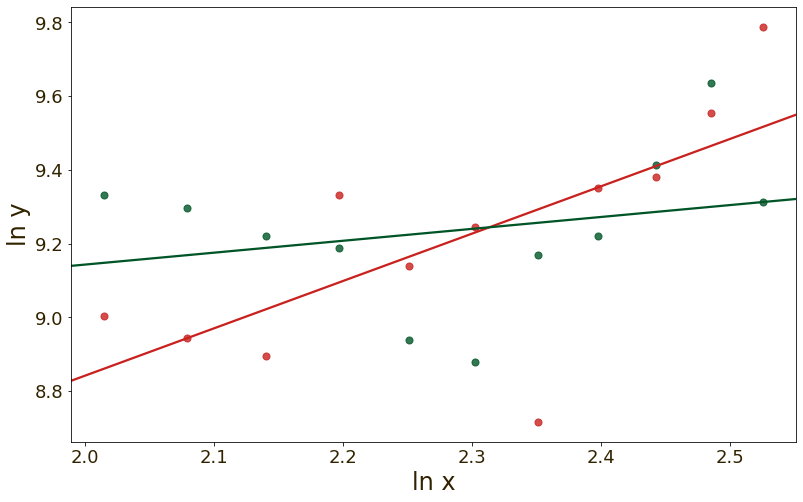

In [5]:
# graphical bilogarithmic regression using seaborn
#
import math

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("ln x", fontsize=24, color="#322300")
ax.set_ylabel("ln y", fontsize=24, color="#322300")

sbn.regplot(x=[math.log(el) for el in x_dataset], y=[math.log(el) for el in y_dataset_a], \
            color='#c9211e', order=1, scatter_kws={'s':50}, ci=None, truncate=False)
sbn.regplot(x=[math.log(el) for el in x_dataset], y=[math.log(el) for el in y_dataset_b], \
            color='#005528', order=1, scatter_kws={'s':50}, ci=None, truncate=False)


In [6]:
# bilogarithmic regression using statsmodels
#
import math

logx_array = sm.add_constant(np.asarray([math.log(el) for el in x_dataset]))
log_fit_a = sm.OLS(np.asarray([math.log(el) for el in y_dataset_a]), logx_array).fit()
log_fit_b = sm.OLS(np.asarray([math.log(el) for el in y_dataset_b]), logx_array).fit()

print("Fit a):\n", log_fit_a.summary())
print("\nFit b):\n", log_fit_b.summary())

Fit a):
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     8.316
Date:                Tue, 07 Dec 2021   Prob (F-statistic):             0.0181
Time:                        10:58:15   Log-Likelihood:                 1.2829
No. Observations:                  11   AIC:                             1.434
Df Residuals:                       9   BIC:                             2.230
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2689      1.024      6.124

/home/horsch/.conda/envs/local/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/horsch/.conda/envs/local/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<AxesSubplot:xlabel='x', ylabel='cubic root of y'>

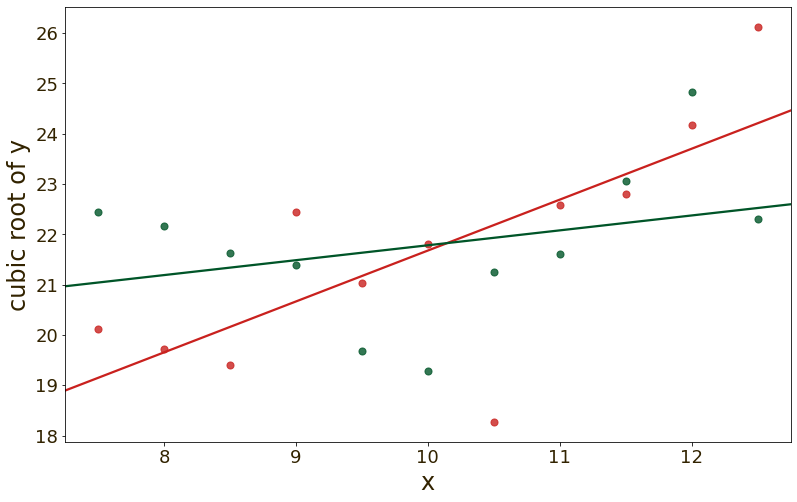

In [7]:
# indirect linear regression: plot cubic root of y
#
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("x", fontsize=24, color="#322300")
ax.set_ylabel("cubic root of y", fontsize=24, color="#322300")

sbn.regplot(x=x_dataset, y=[el**(1/3) for el in y_dataset_a], color='#c9211e', order=1, \
            scatter_kws={'s':50}, ci=None, truncate=False)
sbn.regplot(x=x_dataset, y=[el**(1/3) for el in y_dataset_b], color='#005528', order=1, \
            scatter_kws={'s':50}, ci=None, truncate=False)


<AxesSubplot:xlabel='x', ylabel='y'>

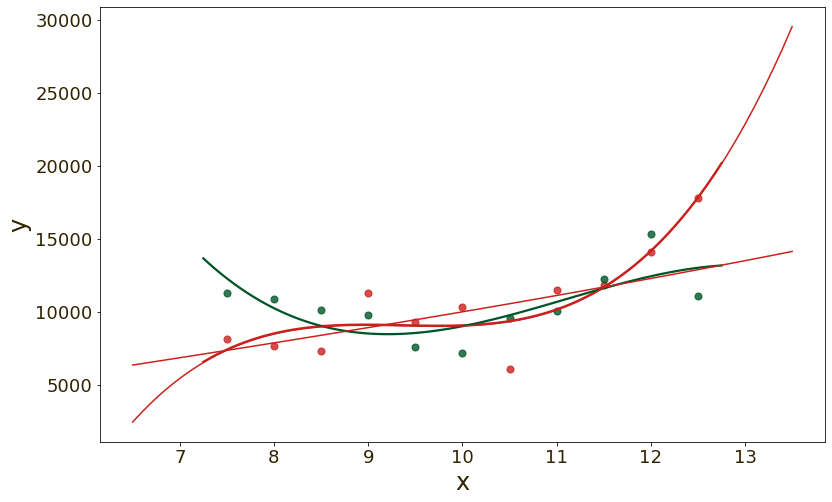

In [8]:
# third-order polynomial regression using seaborn
#
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("x", fontsize=24, color="#322300")
ax.set_ylabel("y", fontsize=24, color="#322300")

sbn.regplot(x=x_dataset, y=y_dataset_a, color='#c9211e', order=3, \
            scatter_kws={'s':50}, ci=None, truncate=False)
sbn.regplot(x=x_dataset, y=y_dataset_b, color='#005528', order=3, \
            scatter_kws={'s':50}, ci=None, truncate=False)

# this is to verify that seaborn and statsmodels (below) actually produce the same third-order correlation
#
sbn.lineplot(x=np.arange(6.5, 13.55, 0.1), y=[297.87*x*x*x - 8367.4*x*x + 78210*x - 234200 for x in np.arange(6.5, 13.55, 0.1)], color='#c9211e', ax=ax)

# compare the function from which the data were generated
#
sbn.lineplot(x=np.arange(6.5, 13.55, 0.1), y=[fct_a(x) for x in np.arange(6.5, 13.55, 0.1)], color='#c9211e', ax=ax)

In [9]:
# third-order polynomial regression using statsmodels
#
x_expansion_2d_array = np.asarray([[1, x, x*x, x*x*x] for x in x_dataset])

log_fit_a = sm.OLS(np.asarray(y_dataset_a), x_expansion_2d_array).fit()
log_fit_b = sm.OLS(np.asarray(y_dataset_b), x_expansion_2d_array).fit()

print("Matrix of 1, x, x^2, x^3 values:\n", x_expansion_2d_array)
print("\nFit a):\n", log_fit_a.summary())
print("\nFit b):\n", log_fit_b.summary())

Matrix of 1, x, x^2, x^3 values:
 [[1.000000e+00 7.500000e+00 5.625000e+01 4.218750e+02]
 [1.000000e+00 8.000000e+00 6.400000e+01 5.120000e+02]
 [1.000000e+00 8.500000e+00 7.225000e+01 6.141250e+02]
 [1.000000e+00 9.000000e+00 8.100000e+01 7.290000e+02]
 [1.000000e+00 9.500000e+00 9.025000e+01 8.573750e+02]
 [1.000000e+00 1.000000e+01 1.000000e+02 1.000000e+03]
 [1.000000e+00 1.050000e+01 1.102500e+02 1.157625e+03]
 [1.000000e+00 1.100000e+01 1.210000e+02 1.331000e+03]
 [1.000000e+00 1.150000e+01 1.322500e+02 1.520875e+03]
 [1.000000e+00 1.200000e+01 1.440000e+02 1.728000e+03]
 [1.000000e+00 1.250000e+01 1.562500e+02 1.953125e+03]]

Fit a):
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     9.265
Date:                Tue, 07 Dec 2

/home/horsch/.conda/envs/local/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/horsch/.conda/envs/local/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<AxesSubplot:xlabel='x', ylabel='y'>

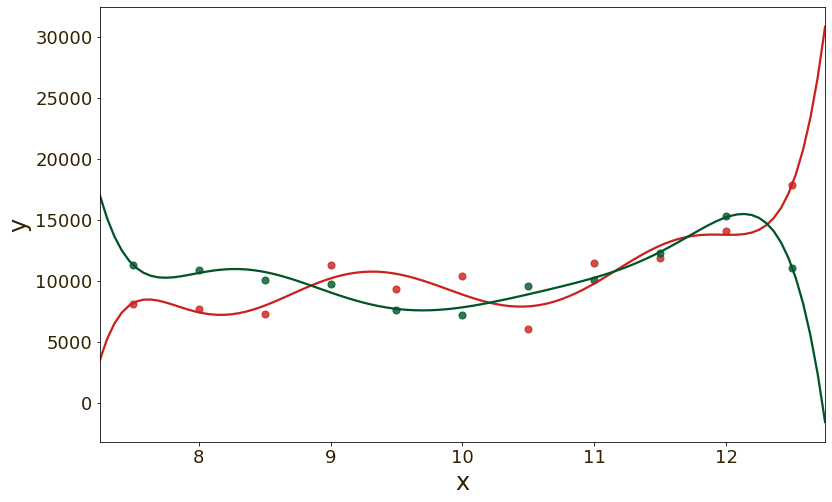

In [10]:
# seventh-order polynomial regression using seaborn
#
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("x", fontsize=24, color="#322300")
ax.set_ylabel("y", fontsize=24, color="#322300")

sbn.regplot(x=x_dataset, y=y_dataset_a, color='#c9211e', order=7, \
            scatter_kws={'s':50}, ci=None, truncate=False)
sbn.regplot(x=x_dataset, y=y_dataset_b, color='#005528', order=7, \
            scatter_kws={'s':50}, ci=None, truncate=False)

In [11]:
# for validation and testing, determine the root mean square deviation between
# data estimated using a correlation expression and the actual data
#
def root_mean_square_deviation(xdata, ydata, estimator, coeff):
    ydata_estimated = [estimator(coeff, x) for x in xdata]
    square_deviation = [(ydata[i] - ydata_estimated[i])**2 for i in range(len(ydata))]
    mean_square_deviation = sum(square_deviation) / len(square_deviation)
    return mean_square_deviation**0.5

# null hypothesis, data are merely fluctuating around a constant value; averages determined above
#
def const_estimator(coeff, x):
    return coeff[0]
const_coeff_list_a = [y_dataset_average_a]
const_coeff_list_b = [y_dataset_average_b]

# linear correlation, parameters determined above
#
def linear_estimator(coeff, x):
    return coeff[0] + x*coeff[1]
linear_coeff_list_a = [-4997.9028, 1549.5537]
linear_coeff_list_b = [5801.8258, 466.8272]

# bilogarithmic correlation, parameters determined above
#
def bilog_estimator(coeff, x):
    return math.exp(coeff[0] + math.log(x)*coeff[1])
bilog_coeff_list_a = [6.2689, 1.2861]
bilog_coeff_list_b = [8.4962, 0.3233]

# cubic correlation, parameters determined above
#
def cubic_estimator(coeff, x):
    return coeff[0] + x*coeff[1] + x*x*coeff[2] + x*x*x*coeff[3]
cubic_coeff_list_a = [-2.342e+05, 7.821e+04, -8367.3711, 297.8664]
cubic_coeff_list_b = [2.332e+05, -6.395e+04, 5937.8004, -178.4986]

In [12]:
print("*** VALIDATION OF MODELS FOR DATA SET A ***\n")
print("Root mean square deviation from null hypothesis/const.:\t", \
     round(root_mean_square_deviation(x_val_dataset, y_val_dataset_a, const_estimator, const_coeff_list_a), 1))
print("Root mean square deviation from linear regression:\t", \
     round(root_mean_square_deviation(x_val_dataset, y_val_dataset_a, linear_estimator, linear_coeff_list_a), 1))
print("Root mean square deviation from bilog. regression:\t", \
     round(root_mean_square_deviation(x_val_dataset, y_val_dataset_a, bilog_estimator, bilog_coeff_list_a), 1))
print("Root mean square deviation from cubic regression:\t", \
     round(root_mean_square_deviation(x_val_dataset, y_val_dataset_a, cubic_estimator, cubic_coeff_list_a), 1))

*** VALIDATION OF MODELS FOR DATA SET A ***

Root mean square deviation from null hypothesis/const.:	 3455.2
Root mean square deviation from linear regression:	 2725.4
Root mean square deviation from bilog. regression:	 2672.2
Root mean square deviation from cubic regression:	 3148.1


In [21]:
print("*** TEST OF THE FINAL BILOGARITHMIC REGRESSION MODEL FOR DATA SET A ***\n")
rmsd_a = root_mean_square_deviation(x_test_dataset, y_test_dataset_a, bilog_estimator, bilog_coeff_list_a)
print("Root mean square deviation from the bilogarithmic regression:\t", round(rmsd_a, 1))
print("Double root mean square deviation for the margin of error:\t+-", round(2*rmsd_a, 1))

*** TEST OF THE FINAL BILOGARITHMIC REGRESSION MODEL FOR DATA SET A ***

Root mean square deviation from the bilogarithmic regression:	 2459.0
Double root mean square deviation for the margin of error:	+- 4918.1


In [14]:
print("*** VALIDATION OF MODELS FOR DATA SET B ***\n")
print("Root mean square deviation from null hypothesis/const.:\t", \
     round(root_mean_square_deviation(x_val_dataset, y_val_dataset_b, const_estimator, const_coeff_list_b), 1))
print("Root mean square deviation from linear regression:\t", \
     round(root_mean_square_deviation(x_val_dataset, y_val_dataset_b, linear_estimator, linear_coeff_list_b), 1))
print("Root mean square deviation from bilog. regression:\t", \
     round(root_mean_square_deviation(x_val_dataset, y_val_dataset_b, bilog_estimator, bilog_coeff_list_b), 1))
print("Root mean square deviation from cubic regression:\t", \
     round(root_mean_square_deviation(x_val_dataset, y_val_dataset_b, cubic_estimator, cubic_coeff_list_b), 1))

*** VALIDATION OF MODELS FOR DATA SET B ***

Root mean square deviation from null hypothesis/const.:	 1199.5
Root mean square deviation from linear regression:	 1392.3
Root mean square deviation from bilog. regression:	 1394.6
Root mean square deviation from cubic regression:	 2302.9


In [22]:
print("*** TEST OF THE FINAL MODEL (CONSTANT AVERAGE VALUE) FOR DATA SET B ***\n")
rmsd_b = root_mean_square_deviation(x_test_dataset, y_test_dataset_b, const_estimator, const_coeff_list_b)
print("Root mean square deviation from the final constant-value model:\t", round(rmsd_b, 1))
print("Double root mean square deviation for the margin of error:\t+-", round(2*rmsd_b, 1))

*** TEST OF THE FINAL MODEL (CONSTANT AVERAGE VALUE) FOR DATA SET B ***

Root mean square deviation from the final constant-value model:	 2139.0
Double root mean square deviation for the margin of error:	+- 4278.0


<AxesSubplot:xlabel='x', ylabel='y'>

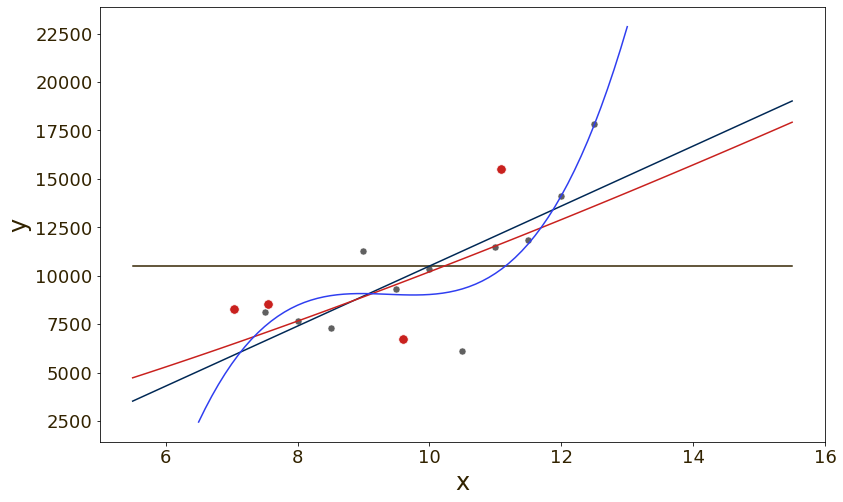

In [16]:
import seaborn as sbn
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("x", fontsize=24, color="#322300")
ax.set_ylabel("y", fontsize=24, color="#322300")


sbn.scatterplot(x=x_dataset, y=y_dataset_a, color="#606060", s=50)  # grey for training data set A
sbn.scatterplot(x=x_val_dataset, y=y_val_dataset_a, color="#c9211e", s=90)  # red for validation data set A

plotrange_a = np.arange(5.5, 15.55, 0.1)
plotrange_a_cubic = np.arange(6.5, 13.05, 0.1)
sbn.lineplot(x=plotrange_a, y=[const_estimator(const_coeff_list_a, x) for x in plotrange_a], \
             color='#322300', ax=ax)  # black for constant average value
sbn.lineplot(x=plotrange_a, y=[linear_estimator(linear_coeff_list_a, x) for x in plotrange_a], \
             color='#002855', ax=ax)  # dark blue for linear regression
sbn.lineplot(x=plotrange_a, y=[bilog_estimator(bilog_coeff_list_a, x) for x in plotrange_a], \
             color='#c9211e', ax=ax)  # red for bilogarithmic regression
sbn.lineplot(x=plotrange_a_cubic, y=[cubic_estimator(cubic_coeff_list_a, x) for x in plotrange_a_cubic], \
             color='#2f3ef0', ax=ax)  # light blue for cubic regression


<AxesSubplot:xlabel='x', ylabel='y'>

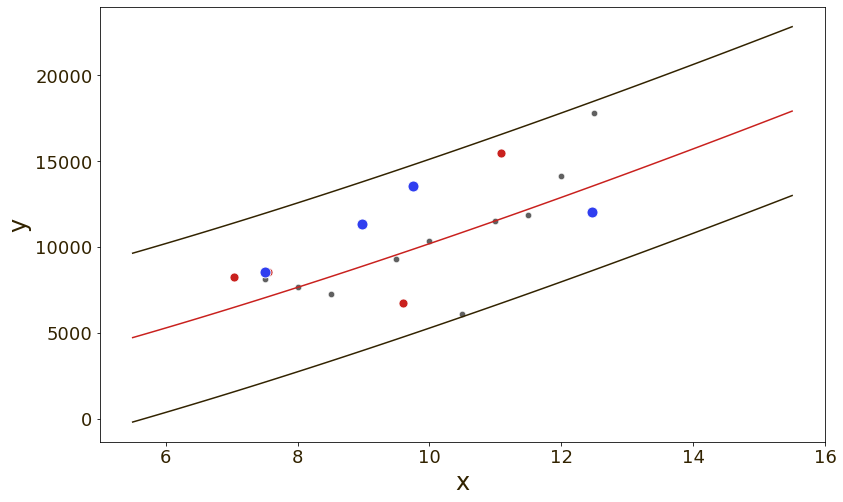

In [17]:
import seaborn as sbn
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("x", fontsize=24, color="#322300")
ax.set_ylabel("y", fontsize=24, color="#322300")


sbn.scatterplot(x=x_dataset, y=y_dataset_a, color="#606060", s=40)  # grey for training data set A
sbn.scatterplot(x=x_val_dataset, y=y_val_dataset_a, color="#c9211e", s=80)  # red for validation data set A
sbn.scatterplot(x=x_test_dataset, y=y_test_dataset_a, color="#2f3ef0", s=120)  # blue for test data set A

plotrange_a = np.arange(5.5, 15.55, 0.1)
sbn.lineplot(x=plotrange_a, y=[bilog_estimator(bilog_coeff_list_a, x) for x in plotrange_a], \
             color='#c9211e', ax=ax)  # red for bilogarithmic regression
sbn.lineplot(x=plotrange_a, y=[bilog_estimator(bilog_coeff_list_a, x) - 2*rmsd_a for x in plotrange_a], \
             color='#322300', ax=ax)  # black for confidence interval
sbn.lineplot(x=plotrange_a, y=[bilog_estimator(bilog_coeff_list_a, x) + 2*rmsd_a for x in plotrange_a], \
             color='#322300', ax=ax)  # black for confidence interval

<AxesSubplot:xlabel='x', ylabel='y'>

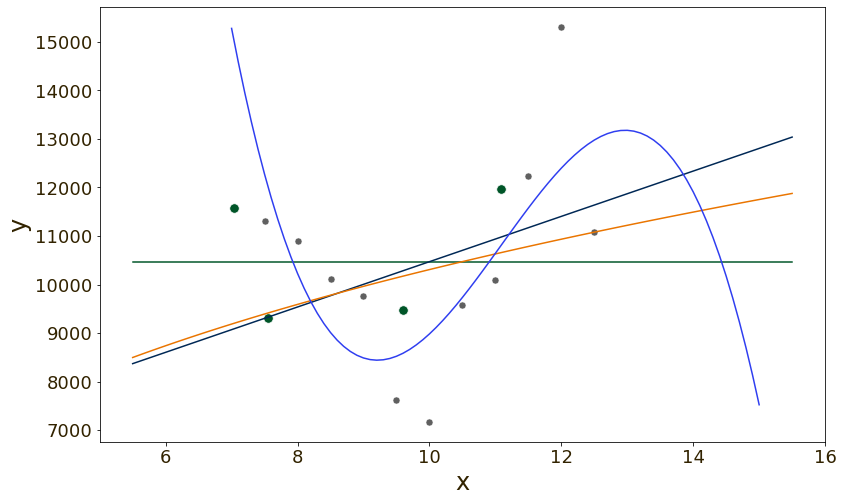

In [18]:
import seaborn as sbn
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("x", fontsize=24, color="#322300")
ax.set_ylabel("y", fontsize=24, color="#322300")


sbn.scatterplot(x=x_dataset, y=y_dataset_b, color="#606060", s=50)  # grey for training data set B
sbn.scatterplot(x=x_val_dataset, y=y_val_dataset_b, color="#005528", s=90)  # green for validation data set B

plotrange_b = np.arange(5.5, 15.55, 0.1)
plotrange_b_cubic = np.arange(7, 15.05, 0.1)
sbn.lineplot(x=plotrange_b, y=[const_estimator(const_coeff_list_b, x) for x in plotrange_b], \
             color='#005528', ax=ax)  # green for constant average value
sbn.lineplot(x=plotrange_b, y=[linear_estimator(linear_coeff_list_b, x) for x in plotrange_b], \
             color='#002855', ax=ax)  # dark blue for linear regression
sbn.lineplot(x=plotrange_b, y=[bilog_estimator(bilog_coeff_list_b, x) for x in plotrange_b], \
             color='#ea7500', ax=ax)  # orange for bilogarithmic regression
sbn.lineplot(x=plotrange_b_cubic, y=[cubic_estimator(cubic_coeff_list_b, x) for x in plotrange_b_cubic], \
             color='#2f3ef0', ax=ax)  # light blue for bilogarithmic regression


<AxesSubplot:xlabel='x', ylabel='y'>

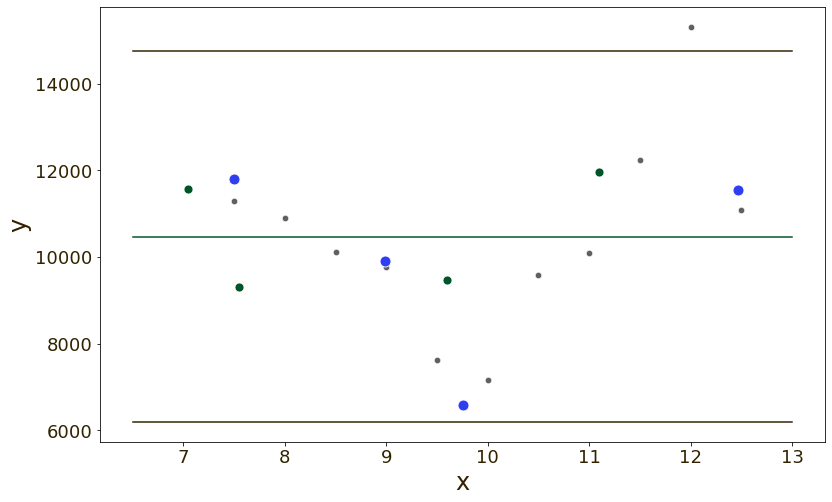

In [19]:
import seaborn as sbn
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("x", fontsize=24, color="#322300")
ax.set_ylabel("y", fontsize=24, color="#322300")

sbn.scatterplot(x=x_dataset, y=y_dataset_b, color="#606060", s=40)  # grey for training data set B
sbn.scatterplot(x=x_val_dataset, y=y_val_dataset_b, color="#005528", s=80)  # green for validation data set B
sbn.scatterplot(x=x_test_dataset, y=y_test_dataset_b, color="#2f3ef0", s=120)  # blue for test data set B

plotrange_b = np.arange(6.5, 13.05, 0.1)
sbn.lineplot(x=plotrange_b, y=[const_estimator(const_coeff_list_b, x) for x in plotrange_b], \
             color='#005528', ax=ax)  # green for constant average value
sbn.lineplot(x=plotrange_b, y=[const_estimator(const_coeff_list_b, x) - 2*rmsd_b for x in plotrange_b], \
             color='#322300', ax=ax)  # black for confidence interval
sbn.lineplot(x=plotrange_b, y=[const_estimator(const_coeff_list_b, x) + 2*rmsd_b for x in plotrange_b], \
             color='#322300', ax=ax)  # black for confidence interval